<a href="https://colab.research.google.com/github/rrhkwk123/Work/blob/main/Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Handling the imports as well as reading the CSV into a variable
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from datetime import timedelta, date

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

bikes.keys()

Index(['Unnamed: 0', 'instant', 'dteday', 'season', 'hr', 'holiday',
       'workingday', 'weathersit', 'hum', 'windspeed', 'temp_c',
       'feels_like_c', 'casual', 'registered'],
      dtype='object')

In [ ]:
# preparing the data to be used in the model
bikes['total_riders'] = bikes['casual'] + bikes['registered']

bikes_data_to_analyze = bikes.drop(columns=['Unnamed: 0', 'instant', 'dteday', 'casual', 'registered']) # dropping the features that we considered unimportant

bikes_data_to_analyze.dropna()

bikes_data_to_analyze.head()

,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,total_riders
0,1,0,0,0,1,0.81,0,3.28,3.0014,16
1,1,1,0,0,1,0.80,0,2.34,1.9982,40
2,1,2,0,0,1,0.80,0,2.34,1.9982,32
3,1,3,0,0,1,0.75,0,3.28,3.0014,13
4,1,4,0,0,1,0.75,0,3.28,3.0014,1


In [ ]:
# Importing tensorflow and numpy in order to create the model that we want to use.
from tensorflow.keras import regularizers
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

In [ ]:
# Set up the training data
train_dataset = bikes_data_to_analyze.sample(frac=0.75, random_state=42)

# Drop the training data before adding the remainder of the dataset as test data.
test_dataset = bikes_data_to_analyze.drop(train_dataset.index)

# getting the features
train_features = train_dataset.copy()
test_features = test_dataset.copy()

# making some nice labels
train_labels = train_features.pop('total_riders')
test_labels = test_features.pop('total_riders')

In [ ]:
# normalizing the data before we get into creating the model 
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [ ]:
# Steps to handle before the creation of the model
test =  np.array(train_features)
test_normalizer = preprocessing.Normalization()
test_normalizer.adapt(test)

In [ ]:
# creating the model
test_model = tf.keras.Sequential([
    test_normalizer,
    layers.Dense(128, activation='relu'), # each of these is another hidden layer
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(units=1)                              
])

test_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_21 (Normalizat (None, 9)                 19        
_________________________________________________________________
dense_50 (Dense)             (None, 128)               1280      
_________________________________________________________________
dense_51 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_52 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 129       
Total params: 34,452
Trainable params: 34,433
Non-trainable params: 19
_________________________________________________________________


In [ ]:
# compiling the model
test_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.03), # a learning rate of .03 and using the mean_absolute_error as our error model
    loss='mean_absolute_error')

In [ ]:
# creating a history to graph as well as epochs to run the model through
history = test_model.fit(
    train_features, train_labels, # the features we want to train our model with and the goal we're aiming for
    epochs=300, # iterations that we went through
    verbose=0, # don't want tons of logs here
    validation_split = 0.2) # we want to validate against 20% of our data

In [ ]:
# creating our graph
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
295,48.606522,54.988857,295
296,47.854649,55.554001,296
297,48.136429,53.893898,297
298,47.305592,53.455898,298
299,47.455292,55.399242,299


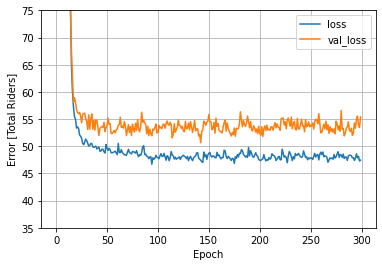

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([35, 75])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Total Riders]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
# modeling our testing data
model_results = {}

model_results['test_model'] = test_model.evaluate(
    test_features,
    test_labels, verbose=0)